# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from datetime import datetime
from dateutil.parser import parse
from api_keys import api_key
from citipy import citipy
output_data_file = "output_data/cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities = cities
url = "http://api.openweathermap.org/data/2.5/weather?"
city = 'Toronto'
uom = 'metric'
citiestest = ['Seoul','Beijing','New York','Tianjin']
cityList = pd.DataFrame(cities, columns=['City'])
params = {
    'units': uom
    ,'appid': api_key
    ,'q': city
    }

In [4]:
#cityList
cityList.to_csv(r'cityList.csv')

In [5]:
city_df = pd.read_csv('cityList.csv',index_col=[0])

In [6]:
lengthofrow = len(city_df)

In [7]:
weather = requests.get(url,params).json()
weather

{'coord': {'lon': -79.39, 'lat': 43.65},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 0.17,
  'feels_like': -3.57,
  'temp_min': -1.11,
  'temp_max': 1.67,
  'pressure': 1011,
  'humidity': 64},
 'visibility': 14484,
 'wind': {'speed': 1.5, 'deg': 250},
 'clouds': {'all': 90},
 'dt': 1576618531,
 'sys': {'type': 1,
  'id': 941,
  'country': 'CA',
  'sunrise': 1576586728,
  'sunset': 1576618908},
 'timezone': -18000,
 'id': 6167865,
 'name': 'Toronto',
 'cod': 200}

In [8]:
#cityTest = 'zavodoukovsk'
#query_url = url+'appid='+api_key+"&q="+cityTest+"&units=metric"
#weather = requests.get(query_url).json()
#weather
#country -------- weather['sys']['country']
#date ------------weather['dt']
#humidity --------weather['main']['humidity']
#longitude -------weather['coord']['lon']
#latitude --------weather['coord']['lat']
#max_temp --------weather['main']['temp_max']
#wind_speed ------weather['wind']['speed']

In [9]:
city_df['Cloudiness'] = ''
city_df['Country'] = ''
city_df['Date'] = ''
city_df['Humidity'] = ''
city_df['Latitude'] = ''

city_df['Longitude'] = ''
city_df['Max Temp'] = ''
city_df['Wind Speed'] = ''

In [10]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,kieta,,,,,,,,
1,tuktoyaktuk,,,,,,,,
2,punta arenas,,,,,,,,
3,alta gracia,,,,,,,,
4,bengkulu,,,,,,,,


In [11]:
#date ------------response['dt']
#humidity --------response['main']['humidity']
#longitude -------response['coord']['lon']
#latitude --------response['coord']['lat']
#max_temp --------response['main']['temp_max']
#wind_speed ------response['wind']['speed']
for index, row in city_df.iterrows():
    city = row['City']
    
    params = {
    'units': uom
    ,'appid': api_key
    ,'q': city
    }
    print(f'Processing Record {index} set of {lengthofrow} | {city}')
    response = requests.get(url,params=params).json()
    try:
        city_df.loc[index,'Cloudiness']=response['clouds']['all']
        city_df.loc[index,'Country']=response['sys']['country']
        city_df.loc[index,'Date']=response['dt']
        city_df.loc[index,'Humidity']=response['main']['humidity']
        city_df.loc[index,'Longitude']=response['coord']['lon']
        city_df.loc[index,'Latitude']=response['coord']['lat']
        city_df.loc[index,'Max Temp']=response['main']['temp_max']
        city_df.loc[index,'Wind Speed']=response['wind']['speed']
    except KeyError:
        print('missing values, i am going to skip it')
        print('====================================')

Processing Record 0 set of 620 | kieta
Processing Record 1 set of 620 | tuktoyaktuk
Processing Record 2 set of 620 | punta arenas
Processing Record 3 set of 620 | alta gracia
Processing Record 4 set of 620 | bengkulu
missing values, i am going to skip it
Processing Record 5 set of 620 | albany
Processing Record 6 set of 620 | butaritari
Processing Record 7 set of 620 | owando
Processing Record 8 set of 620 | launceston
Processing Record 9 set of 620 | khatanga
Processing Record 10 set of 620 | nabire
Processing Record 11 set of 620 | mayumba
Processing Record 12 set of 620 | ushuaia
Processing Record 13 set of 620 | puerto ayora
Processing Record 14 set of 620 | ancud
Processing Record 15 set of 620 | rurrenabaque
Processing Record 16 set of 620 | les ponts-de-ce
Processing Record 17 set of 620 | nabari
Processing Record 18 set of 620 | lagoa
Processing Record 19 set of 620 | boone
Processing Record 20 set of 620 | faanui
Processing Record 21 set of 620 | port elizabeth
Processing Reco

Processing Record 163 set of 620 | upernavik
Processing Record 164 set of 620 | samarai
Processing Record 165 set of 620 | sitka
Processing Record 166 set of 620 | yanam
Processing Record 167 set of 620 | carutapera
Processing Record 168 set of 620 | kampot
Processing Record 169 set of 620 | arraial do cabo
Processing Record 170 set of 620 | codrington
Processing Record 171 set of 620 | nome
Processing Record 172 set of 620 | yellowknife
Processing Record 173 set of 620 | ngorongoro
Processing Record 174 set of 620 | motygino
Processing Record 175 set of 620 | iquique
Processing Record 176 set of 620 | matara
Processing Record 177 set of 620 | tasiilaq
Processing Record 178 set of 620 | petropavlovsk-kamchatskiy
Processing Record 179 set of 620 | belushya guba
missing values, i am going to skip it
Processing Record 180 set of 620 | qaqortoq
Processing Record 181 set of 620 | rawannawi
missing values, i am going to skip it
Processing Record 182 set of 620 | nikolskoye
Processing Record 

Processing Record 328 set of 620 | tessalit
Processing Record 329 set of 620 | moron
Processing Record 330 set of 620 | mattru
Processing Record 331 set of 620 | yangjiang
Processing Record 332 set of 620 | grand gaube
Processing Record 333 set of 620 | pirgos
Processing Record 334 set of 620 | halifax
Processing Record 335 set of 620 | taburi
missing values, i am going to skip it
Processing Record 336 set of 620 | rudnogorsk
Processing Record 337 set of 620 | artyk
missing values, i am going to skip it
Processing Record 338 set of 620 | hami
Processing Record 339 set of 620 | benalla
Processing Record 340 set of 620 | kiunga
Processing Record 341 set of 620 | agirish
Processing Record 342 set of 620 | gamba
Processing Record 343 set of 620 | los llanos de aridane
Processing Record 344 set of 620 | tuy hoa
Processing Record 345 set of 620 | tabiauea
missing values, i am going to skip it
Processing Record 346 set of 620 | puerto leguizamo
Processing Record 347 set of 620 | san cristobal

Processing Record 483 set of 620 | changji
Processing Record 484 set of 620 | tir pol
missing values, i am going to skip it
Processing Record 485 set of 620 | buenos aires
Processing Record 486 set of 620 | liverpool
Processing Record 487 set of 620 | zyryanka
Processing Record 488 set of 620 | petropavl
Processing Record 489 set of 620 | louisbourg
missing values, i am going to skip it
Processing Record 490 set of 620 | sembakung
Processing Record 491 set of 620 | chute-aux-outardes
Processing Record 492 set of 620 | paamiut
Processing Record 493 set of 620 | sinop
Processing Record 494 set of 620 | naze
Processing Record 495 set of 620 | chagda
missing values, i am going to skip it
Processing Record 496 set of 620 | neuquen
Processing Record 497 set of 620 | ovre ardal
Processing Record 498 set of 620 | vallenar
Processing Record 499 set of 620 | khasan
Processing Record 500 set of 620 | anchorage
Processing Record 501 set of 620 | inirida
Processing Record 502 set of 620 | batemans 

In [12]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,kieta,28,PG,1576618839,78,-6.22,155.63,26.68,2.26
1,tuktoyaktuk,20,CA,1576618839,74,69.44,-133.03,-33,1.5
2,punta arenas,75,CL,1576618839,67,-53.16,-70.91,14,5.7
3,alta gracia,0,AR,1576618839,15,-31.66,-64.43,33.33,8.2
4,bengkulu,,,,,,,,


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
city_df.to_csv(r'city_df.csv')

In [14]:
citydf = pd.read_csv('city_df.csv',index_col=[0])

In [15]:
citydf.count()

City          620
Cloudiness    561
Country       558
Date          561
Humidity      561
Latitude      561
Longitude     561
Max Temp      561
Wind Speed    561
dtype: int64

In [16]:
citydf =citydf.dropna(how='any')

In [17]:
citydf =citydf.reset_index(drop=True)

In [18]:
citydf.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Latitude      558
Longitude     558
Max Temp      558
Wind Speed    558
dtype: int64

In [19]:
def windspeeds(x):
    '''convert MPS Wind Speed to miles per hour'''
    return x * 2.236936

In [20]:
for x in citydf['Wind Speed']:
    citydf['Wind Speed (mph)'] = windspeeds(citydf['Wind Speed'])

In [21]:
def Farenheit(i):
    '''convert Kevlin to Farenheit'''
    return (i-273.15) * 9/5 + 32

In [22]:
for x in citydf['Max Temp']:
    citydf['Max Temp (F)'] = Farenheit(citydf['Max Temp'])

In [23]:
citydf.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed,Wind Speed (mph),Max Temp (F)
0,kieta,28.0,PG,1.576619e+09,78.0,-6.22,155.63,26.68,2.26,5.055475,-411.646
1,tuktoyaktuk,20.0,CA,1.576619e+09,74.0,69.44,-133.03,-33.00,1.50,3.355404,-519.070
2,punta arenas,75.0,CL,1.576619e+09,67.0,-53.16,-70.91,14.00,5.70,12.750535,-434.470
3,alta gracia,0.0,AR,1.576619e+09,15.0,-31.66,-64.43,33.33,8.20,18.342875,-399.676
4,albany,90.0,US,1.576619e+09,92.0,42.65,-73.75,-1.11,1.50,3.355404,-461.668


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [24]:
x_axis = citydf['Latitude']

In [25]:
y_axis = citydf['Max Temp']

In [26]:
date = pd.to_datetime(citydf['Date'][0],unit='s')
date = date.strftime('%m-%d-%y')
date = str(date)
date
#date = str(date)
#date = date[:10]
date = "(" + date + ")"
#date.strftime('%mm-%dd-%YY')

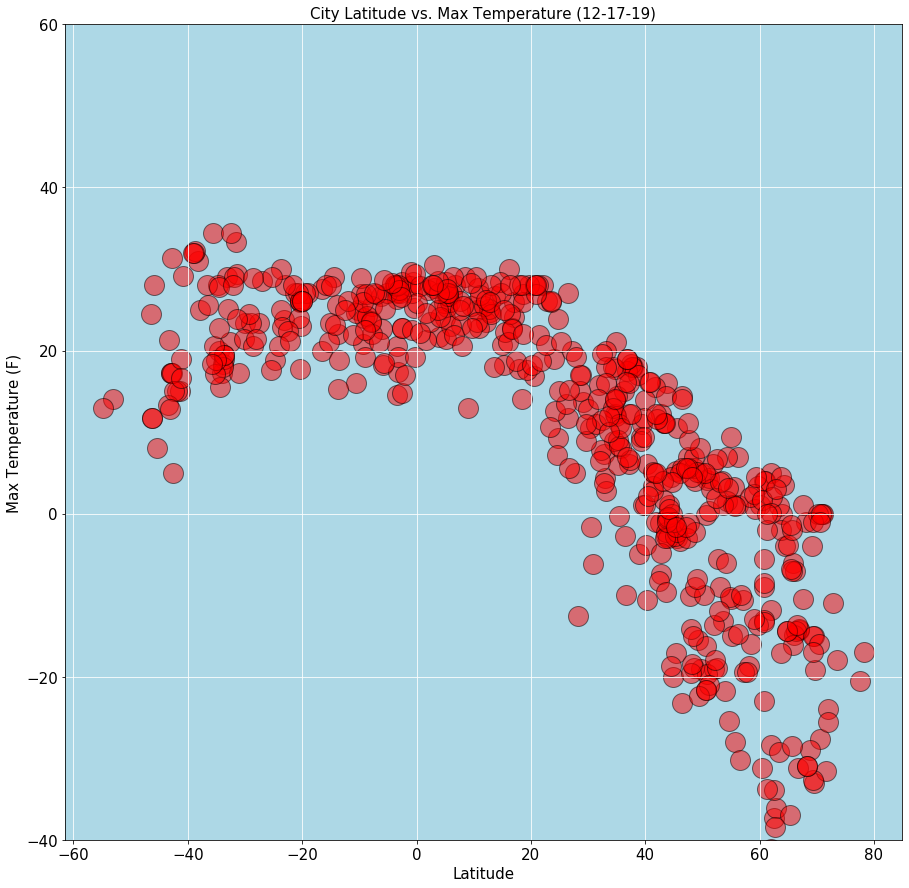

In [40]:
figure, ax = plt.subplots()
ax.scatter(x_axis,y_axis,c='red',alpha=0.5,edgecolor='black',s=400)
ax.grid(color='white')
ax.set_ylim(-40,60)
ax.set_title(f'City Latitude vs. Max Temperature {date}',size = 15.0)
ax.set_xlabel('Latitude',fontsize = 15.0)
ax.set_ylabel('Max Temperature (F)',fontsize = 15.0)
ax.set_facecolor('lightblue')
figure.set_figheight(15)
figure.set_figwidth(15)
ax.tick_params(axis='both', labelsize=15.0)

#plt.scatter(x_axis,y_axis,alpha=0.5,color='red',edgecolors='black',s=50)
#plt.ylim(-40,50)
#plt.title(f'City Latitude vs. Max Temperature {date}')
#plt.ylabel('Max Temperature (F)')
#plt.xlabel('Latitude')
#plt.grid()
plt.savefig(os.path.join(f'City Latitude vs Max Temperature.png'))
plt.show()

#### Latitude vs. Humidity Plot

In [41]:
y_axis = citydf['Humidity']

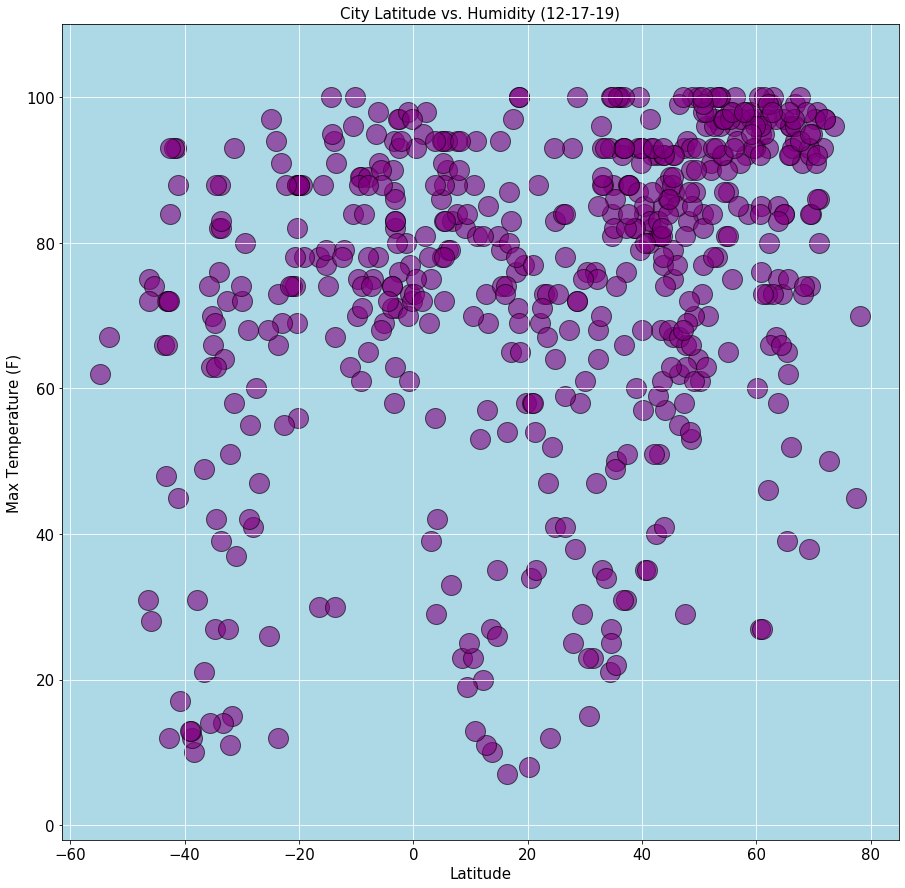

In [43]:
figure, ax = plt.subplots()
ax.scatter(x_axis,y_axis,c='purple',alpha=0.6,edgecolor='black',s=400)
ax.grid(color='white')
ax.set_ylim(-2,110)
ax.set_title(f'City Latitude vs. Humidity {date}',size=15)
ax.set_xlabel('Latitude',fontsize=15)
ax.set_ylabel('Max Temperature (F)',fontsize=15)
ax.set_facecolor('lightblue')
figure.set_figheight(15)
figure.set_figwidth(15)
ax.tick_params(axis='both', labelsize=15.0)

#plt.scatter(x_axis,y_axis,alpha=0.7,c='lightblue',edgecolors='black')
#plt.ylim(0,105)
#plt.title(f'City Latitude vs. Humidity {date}')
#plt.ylabel('Humidity (%)')
#plt.xlabel('Latitude')
#plt.grid()
plt.savefig(os.path.join(f'City Latitude vs Humidity.png'))
plt.show()

#### Latitude vs. Cloudiness Plot

In [44]:
y_axis = citydf['Cloudiness']

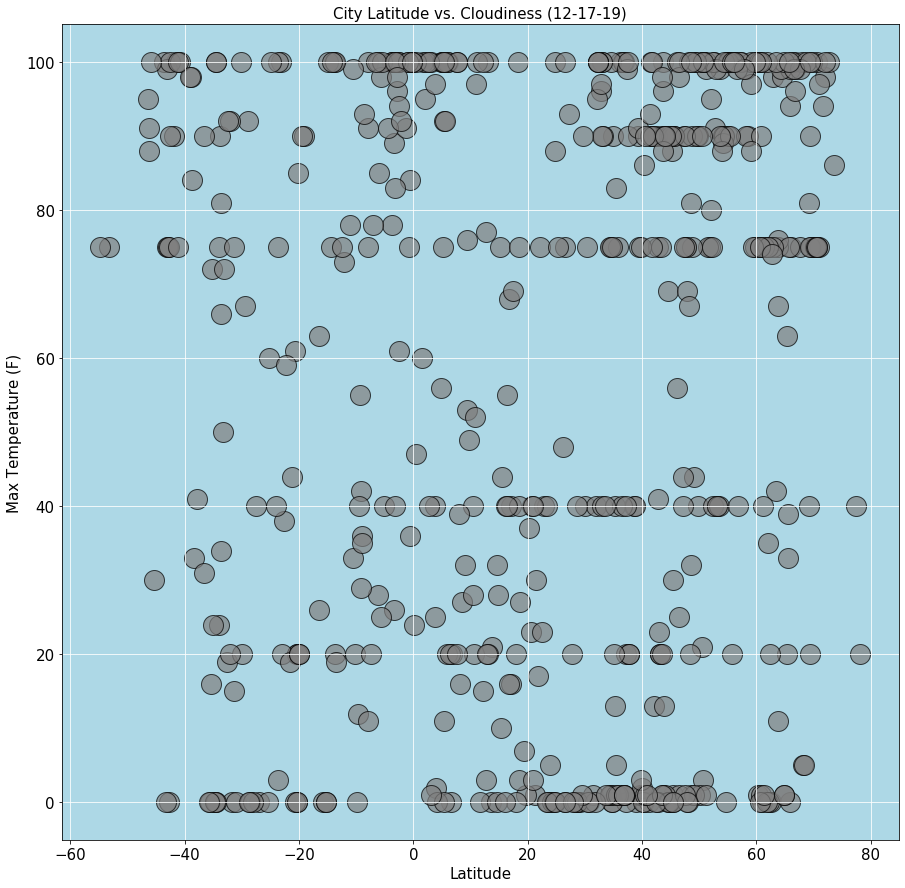

In [45]:
figure, ax = plt.subplots()
ax.scatter(x_axis,y_axis,c='gray',alpha=0.7,edgecolor='black',s=400)
ax.grid(color='white')
ax.set_ylim()
ax.set_title(f'City Latitude vs. Cloudiness {date}',size=15)
ax.set_xlabel('Latitude',fontsize=15)
ax.set_ylabel('Max Temperature (F)',fontsize=15)
ax.set_facecolor('lightblue')
figure.set_figheight(15)
figure.set_figwidth(15)
ax.tick_params(axis='both', labelsize=15.0)

#plt.scatter(x_axis,y_axis,alpha=0.6,c='purple',edgecolors='black')
#plt.title(f'City Latitude vs. Cloudiness {date}')
#plt.ylabel('Cloudiness (%)')
#plt.xlabel('Latitude')
#plt.grid()
plt.savefig(os.path.join(f'City Latitude vs Cloudiness.png'))
plt.show()

#### Latitude vs. Wind Speed Plot

In [47]:
y_axis = citydf['Wind Speed (mph)']

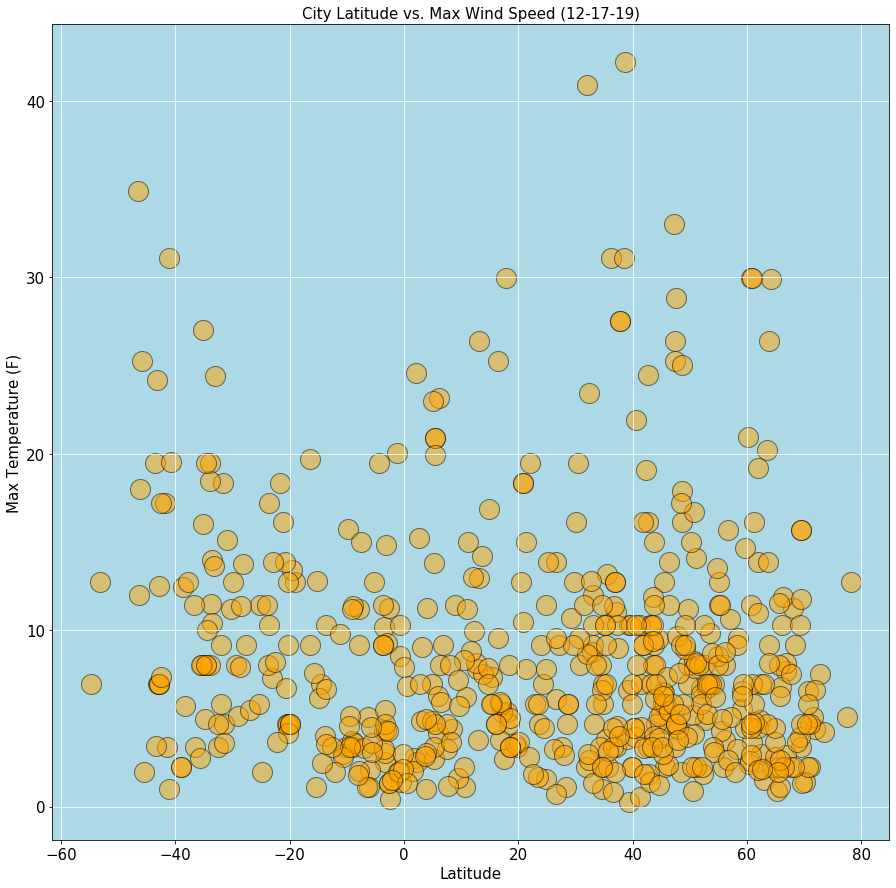

In [48]:
figure, ax = plt.subplots()
ax.scatter(x_axis,y_axis,c='orange',alpha=0.5,edgecolor='black',s=400)
ax.grid(color='white')
ax.set_ylim()
ax.set_title(f'City Latitude vs. Max Wind Speed {date}',size=15)
ax.set_xlabel('Latitude',fontsize=15)
ax.set_ylabel('Max Temperature (F)',fontsize=15)
ax.set_facecolor('lightblue')
figure.set_figheight(15)
figure.set_figwidth(15)
ax.tick_params(axis='both', labelsize=15.0)

#plt.scatter(x_axis,y_axis,alpha=0.7,c='orange',edgecolors='black')
#plt.ylim(-5,50)
#plt.title(f'City Latitude vs. Wind Speed {date}')
#plt.ylabel('Wind Speed (mph)')
#plt.xlabel('Latitude')
#plt.grid()
plt.savefig(os.path.join(f'City Latitude vs Wind Speed.png'))
plt.show()